In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/08_Aug.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,29.500000,81.000000,1,3,1,3331.0,3320.0,3301.0,3118.0,3254.0,3595.0,3303.750000,3142.0
1,29.416667,81.583333,1,3,1,3347.0,3306.0,3268.0,3078.0,3322.0,3490.0,3294.500000,3157.0
2,29.333333,82.166667,1,3,1,3364.0,3315.0,3259.0,3204.0,3401.0,3443.0,3295.666667,3273.0
3,29.250000,82.750000,1,3,1,3355.0,3345.0,3293.0,3132.0,3350.0,3338.0,3292.000000,3249.0
4,29.166667,83.333333,2,3,1,3142.0,3331.0,3320.0,3116.0,3281.0,3153.0,3283.583333,3219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,30.622452,79.727610,23,7,0,3792.0,3736.0,3703.0,3720.0,4040.0,3951.0,3758.333333,3835.0
8924,30.622452,79.727610,24,7,0,3799.0,3749.0,3687.0,3696.0,4015.0,3893.0,3769.416667,3820.0
8925,30.622452,79.727610,24,7,0,3802.0,3729.0,3698.0,3716.0,3961.0,3931.0,3781.833333,3847.0
8926,30.100000,79.727610,24,7,0,3809.0,3754.0,3710.0,3726.0,3990.0,3952.0,3797.083333,3893.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   int64  
 3   B       8928 non-null   int64  
 4   C       8928 non-null   int64  
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 906.9 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   float64
 3   B       8928 non-null   float64
 4   C       8928 non-null   float64
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(13)
memory usage: 906.9 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 4992][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.875207,-0.651124,0.942653,-1.660699,-0.512522,0.606894,-0.108164,-0.157297,-0.239854,-1.081817,-0.529011,0.966826,-0.235922
1,-0.814037,-0.680332,0.996390,-1.660699,-0.512522,0.606894,-0.042764,-0.214678,-0.375447,-1.251527,-0.232908,0.514264,-0.276277
2,-0.340991,-0.709540,1.050127,-1.660699,-0.512522,0.606894,0.026723,-0.177790,-0.412427,-0.716939,0.111094,0.311688,-0.271187
3,-0.438863,-0.738748,1.103864,-1.660699,-0.512522,0.606894,-0.010064,-0.054829,-0.272725,-1.022418,-0.110983,-0.140874,-0.287183
4,-0.561202,-0.767956,1.157601,-1.516262,-0.512522,0.606894,-0.880700,-0.112211,-0.161785,-1.090302,-0.411440,-0.938246,-0.323902


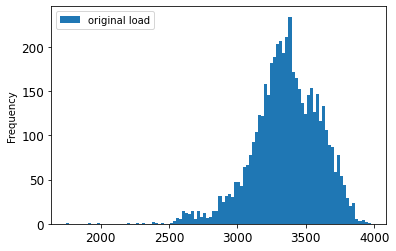

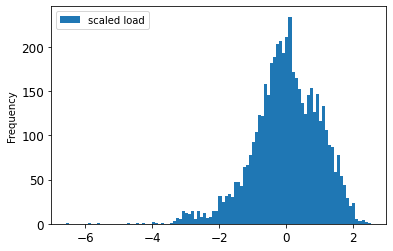

In [9]:
stlf_data[stlf_data.index <= 4992][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 4992][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

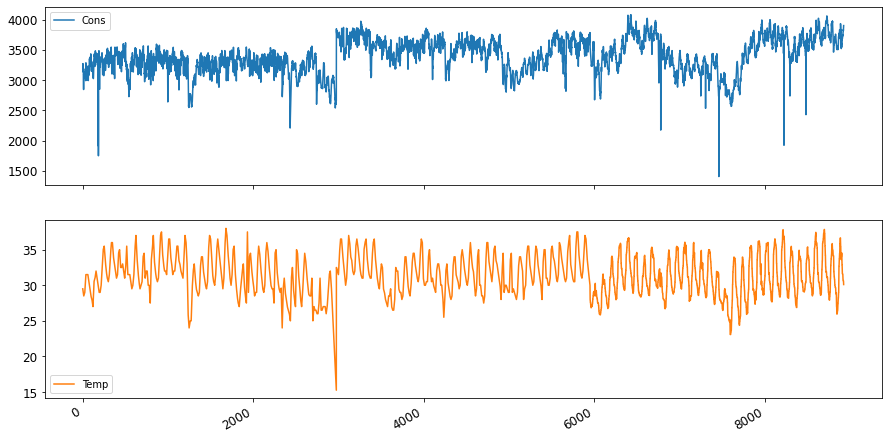

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+1'] = train_shifted['Cons'].shift(-1)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
0,-0.875207,-0.651124,0.942653,-1.660699,-0.512522,0.606894,-0.108164,-0.157297,-0.239854,-1.081817,-0.529011,0.966826,-0.235922,-0.814037
1,-0.814037,-0.680332,0.996390,-1.660699,-0.512522,0.606894,-0.042764,-0.214678,-0.375447,-1.251527,-0.232908,0.514264,-0.276277,-0.340991
2,-0.340991,-0.709540,1.050127,-1.660699,-0.512522,0.606894,0.026723,-0.177790,-0.412427,-0.716939,0.111094,0.311688,-0.271187,-0.438863
3,-0.438863,-0.738748,1.103864,-1.660699,-0.512522,0.606894,-0.010064,-0.054829,-0.272725,-1.022418,-0.110983,-0.140874,-0.287183,-0.561202
4,-0.561202,-0.767956,1.157601,-1.516262,-0.512522,0.606894,-0.880700,-0.112211,-0.161785,-1.090302,-0.411440,-0.938246,-0.323902,-0.826271
5,-0.826271,-0.797165,1.211338,-1.516262,-0.512522,0.606894,-0.819388,-0.046632,-0.219309,-1.255770,-0.533365,-1.227024,-0.379162,-0.797725
6,-0.797725,-0.826373,1.265075,-1.516262,-0.512522,0.606894,-0.345239,0.023046,-0.182330,-1.289712,-0.115338,-1.106341,-0.435149,-0.956767
7,-0.956767,-0.855581,1.318812,-1.516262,-0.512522,0.606894,-0.443339,-0.013842,-0.059063,-1.115759,-0.089211,-1.214094,-0.516221,-1.054638
8,-1.054638,-0.884789,1.372549,-1.371824,-0.512522,0.606894,-0.565963,-0.886866,-0.116587,-1.192128,-0.280807,-0.989967,-0.600929,-1.588854
9,-1.588854,-0.913997,1.426286,-1.371824,-0.512522,0.606894,-0.831650,-0.825386,-0.050845,-1.276984,-0.119692,-0.899455,-0.739079,-2.090446


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-0.875207,-0.651124,0.942653,-1.660699,-0.512522,0.606894,-0.108164,-0.157297,-0.239854,-1.081817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.875207
1,-0.814037,-0.680332,0.996390,-1.660699,-0.512522,0.606894,-0.042764,-0.214678,-0.375447,-1.251527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.875207,-0.814037
2,-0.340991,-0.709540,1.050127,-1.660699,-0.512522,0.606894,0.026723,-0.177790,-0.412427,-0.716939,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.875207,-0.814037,-0.340991
3,-0.438863,-0.738748,1.103864,-1.660699,-0.512522,0.606894,-0.010064,-0.054829,-0.272725,-1.022418,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.875207,-0.814037,-0.340991,-0.438863
4,-0.561202,-0.767956,1.157601,-1.516262,-0.512522,0.606894,-0.880700,-0.112211,-0.161785,-1.090302,...,NaN,NaN,NaN,NaN,NaN,-0.875207,-0.814037,-0.340991,-0.438863,-0.561202
5,-0.826271,-0.797165,1.211338,-1.516262,-0.512522,0.606894,-0.819388,-0.046632,-0.219309,-1.255770,...,NaN,NaN,NaN,NaN,-0.875207,-0.814037,-0.340991,-0.438863,-0.561202,-0.826271
6,-0.797725,-0.826373,1.265075,-1.516262,-0.512522,0.606894,-0.345239,0.023046,-0.182330,-1.289712,...,NaN,NaN,NaN,-0.875207,-0.814037,-0.340991,-0.438863,-0.561202,-0.826271,-0.797725
7,-0.956767,-0.855581,1.318812,-1.516262,-0.512522,0.606894,-0.443339,-0.013842,-0.059063,-1.115759,...,NaN,NaN,-0.875207,-0.814037,-0.340991,-0.438863,-0.561202,-0.826271,-0.797725,-0.956767
8,-1.054638,-0.884789,1.372549,-1.371824,-0.512522,0.606894,-0.565963,-0.886866,-0.116587,-1.192128,...,NaN,-0.875207,-0.814037,-0.340991,-0.438863,-0.561202,-0.826271,-0.797725,-0.956767,-1.054638
9,-1.588854,-0.913997,1.426286,-1.371824,-0.512522,0.606894,-0.831650,-0.825386,-0.050845,-1.276984,...,-0.875207,-0.814037,-0.340991,-0.438863,-0.561202,-0.826271,-0.797725,-0.956767,-1.054638,-1.588854


In [13]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
10,-2.090446,-0.943205,1.480023,-1.371824,-0.512522,0.606894,-0.803038,-0.349936,0.019006,-0.797551,...,-0.814037,-0.340991,-0.438863,-0.561202,-0.826271,-0.797725,-0.956767,-1.054638,-1.588854,-2.090446
11,-1.050560,-0.972414,1.533760,-1.371824,-0.512522,0.606894,-0.962450,-0.448305,-0.017974,-0.835736,...,-0.340991,-0.438863,-0.561202,-0.826271,-0.797725,-0.956767,-1.054638,-1.588854,-2.090446,-1.050560
12,-1.148432,-1.001622,1.587497,-1.227387,-0.512522,0.606894,-1.060550,-0.571266,-0.893165,-0.988476,...,-0.438863,-0.561202,-0.826271,-0.797725,-0.956767,-1.054638,-1.588854,-2.090446,-1.050560,-1.148432
13,-1.181056,-0.987018,1.564467,-1.227387,-0.512522,0.606894,-1.596012,-0.837682,-0.831532,-1.094545,...,-0.561202,-0.826271,-0.797725,-0.956767,-1.054638,-1.588854,-2.090446,-1.050560,-1.148432,-1.181056
14,-1.225914,-0.972414,1.541436,-1.227387,-0.512522,0.606894,-2.098773,-0.808991,-0.354902,-1.039389,...,-0.826271,-0.797725,-0.956767,-1.054638,-1.588854,-2.090446,-1.050560,-1.148432,-1.181056,-1.225914


In [14]:
train_shifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4982 entries, 10 to 4991
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cons_original  4982 non-null   float64
 1   Temp           4982 non-null   float64
 2   Hum            4982 non-null   float64
 3   A              4982 non-null   float64
 4   B              4982 non-null   float64
 5   C              4982 non-null   float64
 6   D              4982 non-null   float64
 7   E              4982 non-null   float64
 8   F              4982 non-null   float64
 9   G              4982 non-null   float64
 10  H              4982 non-null   float64
 11  I              4982 non-null   float64
 12  J              4982 non-null   float64
 13  y_t+1          4982 non-null   float64
 14  Cons_t-10      4982 non-null   float64
 15  Cons_t-9       4982 non-null   float64
 16  Cons_t-8       4982 non-null   float64
 17  Cons_t-7       4982 non-null   float64
 18  Cons_t-

In [15]:
y_train = train_shifted[['y_t+1']]
y_train


,y_t+1
10,-1.050560
11,-1.148432
12,-1.181056
13,-1.225914
14,-1.201446
...,...
4987,-0.141170
4988,0.123899
4989,0.397123
4990,0.254394


In [16]:
X_train = train_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
10,-2.090446,-2.090446,-1.588854,-1.054638,-0.956767,-0.797725,-0.826271,-0.561202,-0.438863,-0.340991,...,-1.371824,-0.512522,0.606894,-0.803038,-0.349936,0.019006,-0.797551,0.028359,-0.455513,-0.928127
11,-1.050560,-1.050560,-2.090446,-1.588854,-1.054638,-0.956767,-0.797725,-0.826271,-0.561202,-0.438863,...,-1.371824,-0.512522,0.606894,-0.962450,-0.448305,-0.017974,-0.835736,-0.141464,-0.520165,-1.021196
12,-1.148432,-1.148432,-1.050560,-2.090446,-1.588854,-1.054638,-0.956767,-0.797725,-0.826271,-0.561202,...,-1.227387,-0.512522,0.606894,-1.060550,-0.571266,-0.893165,-0.988476,-0.202427,-0.589127,-1.045554
13,-1.181056,-1.181056,-1.148432,-1.050560,-2.090446,-1.588854,-1.054638,-0.956767,-0.797725,-0.826271,...,-1.227387,-0.512522,0.606894,-1.596012,-0.837682,-0.831532,-1.094545,0.032714,-0.442583,-1.078274
14,-1.225914,-1.225914,-1.181056,-1.148432,-1.050560,-2.090446,-1.588854,-1.054638,-0.956767,-0.797725,...,-1.227387,-0.512522,0.606894,-2.098773,-0.808991,-0.354902,-1.039389,0.063195,-0.468443,-1.157165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,-0.181950,-0.181950,-0.222730,-0.345069,-0.365459,-0.451097,-0.471487,-0.377693,-0.369537,-0.491877,...,1.516927,-0.512522,0.606894,-0.455601,-0.501588,-1.135589,1.434143,1.195353,0.803041,-0.510041
4988,-0.141170,-0.141170,-0.181950,-0.222730,-0.345069,-0.365459,-0.451097,-0.471487,-0.377693,-0.369537,...,1.661365,-0.512522,0.606894,-0.369764,-0.378627,-1.024650,1.408686,1.230188,0.820282,-0.432968
4989,0.123899,0.123899,-0.141170,-0.181950,-0.222730,-0.345069,-0.365459,-0.451097,-0.471487,-0.377693,...,1.661365,-0.512522,0.606894,-0.349326,-0.386824,-0.852077,1.535969,1.465329,1.104750,-0.347533
4990,0.397123,0.397123,0.123899,-0.141170,-0.181950,-0.222730,-0.345069,-0.365459,-0.451097,-0.471487,...,1.661365,-0.512522,0.606894,-0.226702,-0.481094,-0.560346,1.633553,1.652570,1.315945,-0.263552


In [17]:
X_train=np.atleast_3d(X_train)
X_train.shape

(4982, 24, 1)

In [18]:

#subsequences=2
#timesteps=X_train.shape[1]//subsequences
X_train=X_train.reshape(4982,24,1)
#print(X_train.shape)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=4993) & (stlf_data.index <5953)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,3387.0,29.000000,87.416667,1.0,4.0,1.0,3387.0,3272.0,3264.0,3600.0,3652.0,3576.0,3335.166667
4994,3352.0,29.000000,86.833333,1.0,4.0,1.0,3454.0,3302.0,3241.0,3597.0,3722.0,3615.0,3344.416667
4995,3363.0,29.000000,86.250000,1.0,4.0,1.0,3419.0,3312.0,3246.0,3588.0,3740.0,3631.0,3354.166667
4996,3341.0,29.000000,85.666667,2.0,4.0,1.0,3413.0,3322.0,3267.0,3571.0,3710.0,3600.0,3360.333333
4997,3316.0,29.000000,85.083333,2.0,4.0,1.0,3387.0,3387.0,3272.0,3532.0,3678.0,3551.0,3364.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948,3656.0,30.326087,85.333333,24.0,6.0,1.0,3634.0,3736.0,3658.0,3672.0,3759.0,3107.0,3687.333333
5949,3656.0,30.217391,86.250000,24.0,6.0,1.0,3627.0,3725.0,3666.0,3663.0,3697.0,3117.0,3686.500000
5950,3646.0,30.108696,87.166667,24.0,6.0,1.0,3657.0,3658.0,3757.0,3762.0,3773.0,2860.0,3677.250000
5951,3786.0,30.000000,88.083333,24.0,6.0,1.0,3724.0,3652.0,3756.0,3747.0,3787.0,2985.0,3679.750000


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,-0.047499,-1.509431,1.928465,-1.661325,-0.168014,0.5,-0.043015,-0.505737,-0.531821,0.965059,1.180708,0.992356,-0.262201
4994,-0.189387,-1.509431,1.871324,-1.661325,-0.168014,0.5,0.229408,-0.383509,-0.625777,0.953109,1.461198,1.157868,-0.222925
4995,-0.144793,-1.509431,1.814183,-1.661325,-0.168014,0.5,0.087097,-0.342767,-0.605352,0.917259,1.533324,1.225770,-0.181526
4996,-0.233980,-1.509431,1.757043,-1.516862,-0.168014,0.5,0.062701,-0.302025,-0.519566,0.849543,1.413114,1.094210,-0.155342
4997,-0.335328,-1.509431,1.699902,-1.516862,-0.168014,0.5,-0.043015,-0.037199,-0.499141,0.694193,1.284890,0.886259,-0.139773
4998,-0.262358,-1.509431,1.642761,-1.516862,-0.168014,0.5,-0.185325,0.235776,-0.376591,0.749960,1.336981,0.809870,-0.128451
4999,-0.355598,-1.509431,1.585620,-1.516862,-0.168014,0.5,-0.140599,0.093177,-0.335741,0.634443,1.300918,0.822601,-0.128804
5000,-0.400191,-1.509431,1.528480,-1.372399,-0.168014,0.5,-0.230052,0.068732,-0.294891,0.594610,1.232799,0.741967,-0.136589
5001,-0.517756,-1.509431,1.471339,-1.372399,-0.168014,0.5,-0.331702,-0.037199,-0.029365,0.694193,1.413114,0.843821,-0.177634
5002,-0.594781,-1.509431,1.414198,-1.372399,-0.168014,0.5,-0.258514,-0.179797,0.244330,0.849543,1.549352,0.898991,-0.249109


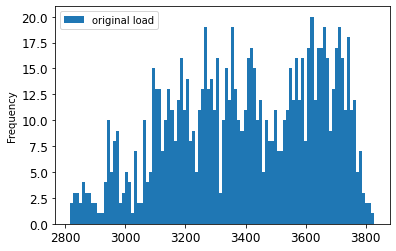

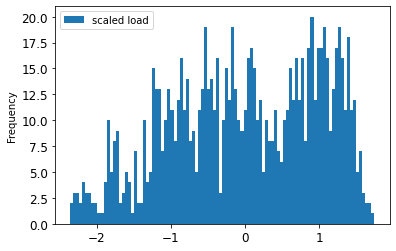

In [21]:
stlf_data[(stlf_data.index >=4993) & (stlf_data.index <=5953)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=4993) & (valid.index <=5953)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+1'] = valid_shifted['Cons'].shift(-1)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4993,-0.047499,-1.509431,1.928465,-1.661325,-0.168014,0.5,-0.043015,-0.505737,-0.531821,0.965059,1.180708,0.992356,-0.262201,-0.189387
4994,-0.189387,-1.509431,1.871324,-1.661325,-0.168014,0.5,0.229408,-0.383509,-0.625777,0.953109,1.461198,1.157868,-0.222925,-0.144793
4995,-0.144793,-1.509431,1.814183,-1.661325,-0.168014,0.5,0.087097,-0.342767,-0.605352,0.917259,1.533324,1.225770,-0.181526,-0.233980
4996,-0.233980,-1.509431,1.757043,-1.516862,-0.168014,0.5,0.062701,-0.302025,-0.519566,0.849543,1.413114,1.094210,-0.155342,-0.335328
4997,-0.335328,-1.509431,1.699902,-1.516862,-0.168014,0.5,-0.043015,-0.037199,-0.499141,0.694193,1.284890,0.886259,-0.139773,-0.262358
4998,-0.262358,-1.509431,1.642761,-1.516862,-0.168014,0.5,-0.185325,0.235776,-0.376591,0.749960,1.336981,0.809870,-0.128451,-0.355598
4999,-0.355598,-1.509431,1.585620,-1.516862,-0.168014,0.5,-0.140599,0.093177,-0.335741,0.634443,1.300918,0.822601,-0.128804,-0.400191
5000,-0.400191,-1.509431,1.528480,-1.372399,-0.168014,0.5,-0.230052,0.068732,-0.294891,0.594610,1.232799,0.741967,-0.136589,-0.517756
5001,-0.517756,-1.509431,1.471339,-1.372399,-0.168014,0.5,-0.331702,-0.037199,-0.029365,0.694193,1.413114,0.843821,-0.177634,-0.594781
5002,-0.594781,-1.509431,1.414198,-1.372399,-0.168014,0.5,-0.258514,-0.179797,0.244330,0.849543,1.549352,0.898991,-0.249109,-0.631266


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
4993,-0.047499,-1.509431,1.928465,-1.661325,-0.168014,0.5,-0.043015,-0.505737,-0.531821,0.965059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.047499
4994,-0.189387,-1.509431,1.871324,-1.661325,-0.168014,0.5,0.229408,-0.383509,-0.625777,0.953109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.047499,-0.189387
4995,-0.144793,-1.509431,1.814183,-1.661325,-0.168014,0.5,0.087097,-0.342767,-0.605352,0.917259,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.047499,-0.189387,-0.144793
4996,-0.233980,-1.509431,1.757043,-1.516862,-0.168014,0.5,0.062701,-0.302025,-0.519566,0.849543,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.047499,-0.189387,-0.144793,-0.233980
4997,-0.335328,-1.509431,1.699902,-1.516862,-0.168014,0.5,-0.043015,-0.037199,-0.499141,0.694193,...,NaN,NaN,NaN,NaN,NaN,-0.047499,-0.189387,-0.144793,-0.233980,-0.335328
4998,-0.262358,-1.509431,1.642761,-1.516862,-0.168014,0.5,-0.185325,0.235776,-0.376591,0.749960,...,NaN,NaN,NaN,NaN,-0.047499,-0.189387,-0.144793,-0.233980,-0.335328,-0.262358
4999,-0.355598,-1.509431,1.585620,-1.516862,-0.168014,0.5,-0.140599,0.093177,-0.335741,0.634443,...,NaN,NaN,NaN,-0.047499,-0.189387,-0.144793,-0.233980,-0.335328,-0.262358,-0.355598
5000,-0.400191,-1.509431,1.528480,-1.372399,-0.168014,0.5,-0.230052,0.068732,-0.294891,0.594610,...,NaN,NaN,-0.047499,-0.189387,-0.144793,-0.233980,-0.335328,-0.262358,-0.355598,-0.400191
5001,-0.517756,-1.509431,1.471339,-1.372399,-0.168014,0.5,-0.331702,-0.037199,-0.029365,0.694193,...,NaN,-0.047499,-0.189387,-0.144793,-0.233980,-0.335328,-0.262358,-0.355598,-0.400191,-0.517756
5002,-0.594781,-1.509431,1.414198,-1.372399,-0.168014,0.5,-0.258514,-0.179797,0.244330,0.849543,...,-0.047499,-0.189387,-0.144793,-0.233980,-0.335328,-0.262358,-0.355598,-0.400191,-0.517756,-0.594781


In [24]:
valid_shifted = valid_shifted.dropna(how='any')
valid_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5003,-0.631266,-1.509431,1.357057,-1.372399,-0.168014,0.5,-0.352032,-0.134981,0.101355,0.769876,...,-0.189387,-0.144793,-0.233980,-0.335328,-0.262358,-0.355598,-0.400191,-0.517756,-0.594781,-0.631266
5004,-0.675859,-1.509431,1.299917,-1.227936,-0.168014,0.5,-0.396758,-0.224614,0.076845,0.622493,...,-0.144793,-0.233980,-0.335328,-0.262358,-0.355598,-0.400191,-0.517756,-0.594781,-0.631266,-0.675859
5005,-0.748830,-1.345597,1.169309,-1.227936,-0.168014,0.5,-0.514672,-0.326470,-0.029365,0.598593,...,-0.233980,-0.335328,-0.262358,-0.355598,-0.400191,-0.517756,-0.594781,-0.631266,-0.675859,-0.748830
5006,-0.829909,-1.181764,1.038702,-1.227936,-0.168014,0.5,-0.591927,-0.253134,-0.172341,0.510960,...,-0.335328,-0.262358,-0.355598,-0.400191,-0.517756,-0.594781,-0.631266,-0.675859,-0.748830,-0.829909
5007,-0.846125,-1.017930,0.908094,-1.227936,-0.168014,0.5,-0.628521,-0.346841,-0.127405,0.499010,...,-0.262358,-0.355598,-0.400191,-0.517756,-0.594781,-0.631266,-0.675859,-0.748830,-0.829909,-0.846125


In [25]:
y_valid = valid_shifted[['y_t+1']]
y_valid


,y_t+1
5003,-0.675859
5004,-0.748830
5005,-0.829909
5006,-0.846125
5007,-0.910988
...,...
5947,1.043011
5948,1.043011
5949,1.002472
5950,1.570024


In [26]:
X_valid = valid_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
5003,-0.631266,-0.631266,-0.594781,-0.517756,-0.400191,-0.355598,-0.262358,-0.335328,-0.233980,-0.144793,...,-1.372399,-0.168014,0.5,-0.352032,-0.134981,0.101355,0.769876,1.509282,0.869284,-0.311384
5004,-0.675859,-0.675859,-0.631266,-0.594781,-0.517756,-0.400191,-0.355598,-0.262358,-0.335328,-0.233980,...,-1.227936,-0.168014,0.5,-0.396758,-0.224614,0.076845,0.622493,1.389072,0.818357,-0.375429
5005,-0.748830,-0.748830,-0.675859,-0.631266,-0.594781,-0.517756,-0.400191,-0.355598,-0.262358,-0.335328,...,-1.227936,-0.168014,0.5,-0.514672,-0.326470,-0.029365,0.598593,1.328967,0.737724,-0.436643
5006,-0.829909,-0.829909,-0.748830,-0.675859,-0.631266,-0.594781,-0.517756,-0.400191,-0.355598,-0.262358,...,-1.227936,-0.168014,0.5,-0.591927,-0.253134,-0.172341,0.510960,1.393079,0.699529,-0.492549
5007,-0.846125,-0.846125,-0.829909,-0.748830,-0.675859,-0.631266,-0.594781,-0.517756,-0.400191,-0.355598,...,-1.227936,-0.168014,0.5,-0.628521,-0.346841,-0.127405,0.499010,1.324960,0.703773,-0.553763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,1.318679,1.318679,1.047065,0.925447,0.953825,1.026796,1.051119,1.322733,1.367327,1.448405,...,1.516862,0.948205,0.5,1.034478,1.466197,0.889762,1.200075,1.625485,-1.176267,1.233822
5948,1.043011,1.043011,1.318679,1.047065,0.925447,0.953825,1.026796,1.051119,1.322733,1.367327,...,1.661325,0.948205,0.5,0.961290,1.384712,1.077672,1.251858,1.609457,-0.998024,1.233115
5949,1.043011,1.043011,1.043011,1.318679,1.047065,0.925447,0.953825,1.026796,1.051119,1.322733,...,1.661325,0.948205,0.5,0.932828,1.339896,1.110352,1.216008,1.361023,-0.955585,1.229576
5950,1.002472,1.002472,1.043011,1.043011,1.318679,1.047065,0.925447,0.953825,1.026796,1.051119,...,1.661325,0.948205,0.5,1.054808,1.066921,1.482088,1.610357,1.665555,-2.046263,1.190300


In [27]:
X_valid=np.atleast_3d(X_valid)
X_valid.shape

(949, 24, 1)

In [28]:
#subsequences=2
#X_valid=X_valid.shape[1]//subsequences
X_valid=X_valid.reshape(949,24,1)
print(X_valid.shape)

(949, 24, 1)


In [29]:
#from keras.layers import RepeatVector
from keras.layers import BatchNormalization
from keras.layers import Input

model = models.Sequential()
model.add(Conv1D(filters=128, kernel_size=1, padding='causal',activation='relu', dilation_rate=1,input_shape=(24,1)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
model.add(Conv1D(filters=128, kernel_size=2, padding='causal',activation='relu', dilation_rate=2))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(Conv1D(filters=512, kernel_size=1, activation='relu')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Flatten()))
#model.add(RepeatVector(5629))
model.add(Bidirectional(LSTM(128,activation='linear')))
#model.add(Flatten())
#model.add(GRU(300))
#model.add(Dense(150,activation='linear'))
#model.add(Dense(75,activation='linear'))
#model.add(Dropout(0.1))
#model.add(Bidirectional(LSTM(300)))
model.add(Dense(1,activation='linear'))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 24, 128)           256       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 24, 128)           32896     
_________________________________________________________________
time_distributed (TimeDistri (None, 24, 128)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               263168    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 296,577
Trainable params: 296,577
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:

history = model.fit(X_train,
          y_train,
          batch_size=300,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop],
          )


Epoch 1/300
17/17 [==============================] - 7s 409ms/step - loss: 0.6766 - val_loss: 0.3970
Epoch 2/300
17/17 [==============================] - 6s 371ms/step - loss: 0.3423 - val_loss: 0.1836
Epoch 3/300
17/17 [==============================] - 6s 367ms/step - loss: 0.1531 - val_loss: 0.0670
Epoch 4/300
17/17 [==============================] - 6s 366ms/step - loss: 0.0966 - val_loss: 0.0466
Epoch 5/300
17/17 [==============================] - 6s 358ms/step - loss: 0.0881 - val_loss: 0.0481
Epoch 6/300
17/17 [==============================] - 6s 367ms/step - loss: 0.0853 - val_loss: 0.0464
Epoch 7/300
17/17 [==============================] - 7s 424ms/step - loss: 0.0832 - val_loss: 0.0558
Epoch 8/300
17/17 [==============================] - 6s 368ms/step - loss: 0.0839 - val_loss: 0.0442
Epoch 9/300
17/17 [==============================] - 7s 398ms/step - loss: 0.0817 - val_loss: 0.0416
Epoch 10/300
17/17 [==============================] - 7s 398ms/step - loss: 0.0784 - val_lo

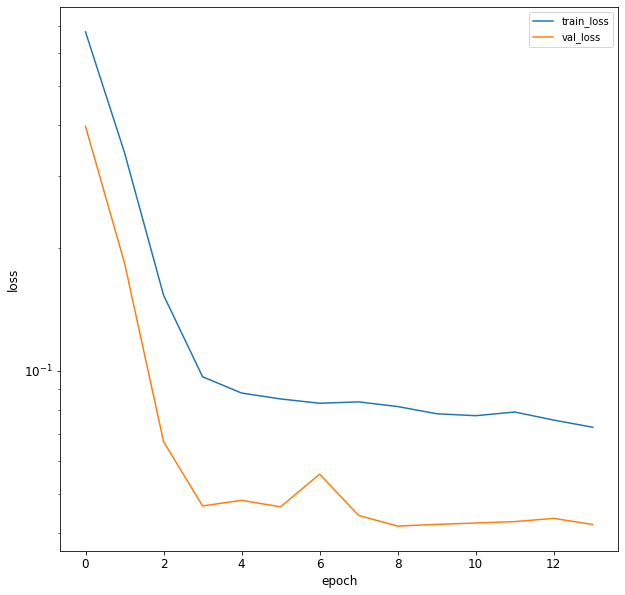

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[stlf_data.index >= 5954][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5954,3521.0,27.797451,86.043576,1.0,5.0,1.0,3541.0,3553.0,3573.0,3774.0,3699.0,3164.0,3541.250000
5955,3499.0,27.592451,86.741806,1.0,5.0,1.0,3572.0,3519.0,3567.0,3724.0,3707.0,3178.0,3535.583333
5956,3460.0,27.592451,86.741806,2.0,5.0,1.0,3537.0,3516.0,3559.0,3640.0,3676.0,3136.0,3527.333333
5957,3449.0,27.592451,86.741806,2.0,5.0,1.0,3523.0,3521.0,3566.0,3646.0,3636.0,3145.0,3517.583333
5958,3419.0,27.392451,87.036713,2.0,5.0,1.0,3521.0,3541.0,3553.0,3634.0,3585.0,3118.0,3506.416667
5959,3413.0,27.192451,87.331620,2.0,5.0,1.0,3499.0,3572.0,3519.0,3597.0,3596.0,3088.0,3497.583333
5960,3392.0,27.192451,87.331620,3.0,5.0,1.0,3460.0,3537.0,3516.0,3558.0,3559.0,3030.0,3487.250000
5961,3366.0,27.192451,87.331620,3.0,5.0,1.0,3449.0,3523.0,3521.0,3569.0,3536.0,2977.0,3474.333333
5962,3352.0,27.017451,88.772835,3.0,5.0,1.0,3419.0,3521.0,3541.0,3599.0,3512.0,2919.0,3458.583333
5963,3345.0,26.842451,90.214050,3.0,5.0,1.0,3413.0,3499.0,3572.0,3561.0,3488.0,2895.0,3439.666667


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2974 entries, 5954 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    2974 non-null   float64
 1   Temp    2974 non-null   float64
 2   Hum     2974 non-null   float64
 3   A       2974 non-null   float64
 4   B       2974 non-null   float64
 5   C       2974 non-null   float64
 6   D       2974 non-null   float64
 7   E       2974 non-null   float64
 8   F       2974 non-null   float64
 9   G       2974 non-null   float64
 10  H       2974 non-null   float64
 11  I       2974 non-null   float64
 12  J       2974 non-null   float64
dtypes: float64(13)
memory usage: 325.3 KB


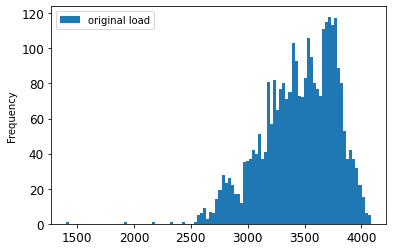

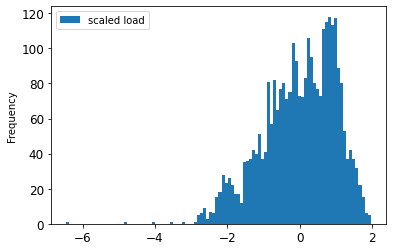

In [36]:
stlf_data[stlf_data.index >= 5954][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[test.index >=5954][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+1'] = test_shifted['Cons'].shift(-1)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5954,0.201026,-1.109062,0.906135,-1.663428,0.402026,0.639905,0.265500,0.304684,0.368627,1.016570,0.805564,-0.861736,0.276833,0.131914
5955,0.131914,-1.179614,0.964710,-1.663428,0.402026,0.639905,0.362989,0.197674,0.349733,0.858280,0.831199,-0.816663,0.258335,0.009397
5956,0.009397,-1.179614,0.964710,-1.518879,0.402026,0.639905,0.252921,0.188232,0.324541,0.592352,0.731865,-0.951882,0.231403,-0.025159
5957,-0.025159,-1.179614,0.964710,-1.518879,0.402026,0.639905,0.208893,0.203969,0.346584,0.611347,0.603693,-0.922906,0.199575,-0.119403
5958,-0.119403,-1.248445,0.989450,-1.518879,0.402026,0.639905,0.202604,0.266916,0.305647,0.573357,0.440273,-1.009833,0.163121,-0.138252
5959,-0.138252,-1.317277,1.014191,-1.518879,0.402026,0.639905,0.133418,0.364484,0.198581,0.456222,0.475521,-1.106417,0.134285,-0.204223
5960,-0.204223,-1.317277,1.014191,-1.374330,0.402026,0.639905,0.010770,0.254327,0.189134,0.332756,0.356961,-1.293148,0.100553,-0.285901
5961,-0.285901,-1.317277,1.014191,-1.374330,0.402026,0.639905,-0.023823,0.210264,0.204879,0.367580,0.283262,-1.463780,0.058387,-0.329881
5962,-0.329881,-1.377504,1.135096,-1.374330,0.402026,0.639905,-0.118167,0.203969,0.267859,0.462554,0.206359,-1.650511,0.006972,-0.351872
5963,-0.351872,-1.437732,1.256002,-1.374330,0.402026,0.639905,-0.137036,0.134727,0.365478,0.342253,0.129456,-1.727779,-0.054781,-0.452398


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5954,0.201026,-1.109062,0.906135,-1.663428,0.402026,0.639905,0.265500,0.304684,0.368627,1.016570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201026
5955,0.131914,-1.179614,0.964710,-1.663428,0.402026,0.639905,0.362989,0.197674,0.349733,0.858280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201026,0.131914
5956,0.009397,-1.179614,0.964710,-1.518879,0.402026,0.639905,0.252921,0.188232,0.324541,0.592352,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201026,0.131914,0.009397
5957,-0.025159,-1.179614,0.964710,-1.518879,0.402026,0.639905,0.208893,0.203969,0.346584,0.611347,...,NaN,NaN,NaN,NaN,NaN,NaN,0.201026,0.131914,0.009397,-0.025159
5958,-0.119403,-1.248445,0.989450,-1.518879,0.402026,0.639905,0.202604,0.266916,0.305647,0.573357,...,NaN,NaN,NaN,NaN,NaN,0.201026,0.131914,0.009397,-0.025159,-0.119403
5959,-0.138252,-1.317277,1.014191,-1.518879,0.402026,0.639905,0.133418,0.364484,0.198581,0.456222,...,NaN,NaN,NaN,NaN,0.201026,0.131914,0.009397,-0.025159,-0.119403,-0.138252
5960,-0.204223,-1.317277,1.014191,-1.374330,0.402026,0.639905,0.010770,0.254327,0.189134,0.332756,...,NaN,NaN,NaN,0.201026,0.131914,0.009397,-0.025159,-0.119403,-0.138252,-0.204223
5961,-0.285901,-1.317277,1.014191,-1.374330,0.402026,0.639905,-0.023823,0.210264,0.204879,0.367580,...,NaN,NaN,0.201026,0.131914,0.009397,-0.025159,-0.119403,-0.138252,-0.204223,-0.285901
5962,-0.329881,-1.377504,1.135096,-1.374330,0.402026,0.639905,-0.118167,0.203969,0.267859,0.462554,...,NaN,0.201026,0.131914,0.009397,-0.025159,-0.119403,-0.138252,-0.204223,-0.285901,-0.329881
5963,-0.351872,-1.437732,1.256002,-1.374330,0.402026,0.639905,-0.137036,0.134727,0.365478,0.342253,...,0.201026,0.131914,0.009397,-0.025159,-0.119403,-0.138252,-0.204223,-0.285901,-0.329881,-0.351872


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5964,-0.452398,-1.437732,1.256002,-1.229782,0.402026,0.639905,-0.203077,0.011981,0.255263,0.307429,...,0.131914,0.009397,-0.025159,-0.119403,-0.138252,-0.204223,-0.285901,-0.329881,-0.351872,-0.452398
5965,-0.546642,-1.437732,1.256002,-1.229782,0.402026,0.639905,-0.284843,-0.022640,0.211177,0.215621,...,0.009397,-0.025159,-0.119403,-0.138252,-0.204223,-0.285901,-0.329881,-0.351872,-0.452398,-0.546642
5966,-0.578057,-1.420524,1.247256,-1.229782,0.402026,0.639905,-0.328870,-0.117060,0.204879,0.180797,...,-0.025159,-0.119403,-0.138252,-0.204223,-0.285901,-0.329881,-0.351872,-0.452398,-0.546642,-0.578057
5967,-0.647169,-1.403316,1.238511,-1.229782,0.402026,0.639905,-0.350884,-0.135944,0.135601,0.168134,...,-0.119403,-0.138252,-0.204223,-0.285901,-0.329881,-0.351872,-0.452398,-0.546642,-0.578057,-0.647169
5968,-0.719423,-1.403316,1.238511,-1.085233,0.402026,0.639905,-0.451518,-0.202039,0.012791,0.196626,...,-0.138252,-0.204223,-0.285901,-0.329881,-0.351872,-0.452398,-0.546642,-0.578057,-0.647169,-0.719423


In [40]:
y_test = test_shifted[['y_t+1']]
y_test

,y_t+1
5964,-0.546642
5965,-0.578057
5966,-0.647169
5967,-0.719423
5968,-0.640886
...,...
8922,1.187446
8923,1.140325
8924,1.225144
8925,1.369651


In [41]:
X_test = test_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
5964,-0.452398,-0.452398,-0.351872,-0.329881,-0.285901,-0.204223,-0.138252,-0.119403,-0.025159,0.009397,...,-1.229782,0.402026,0.639905,-0.203077,0.011981,0.255263,0.307429,0.068574,-1.966021,-0.115718
5965,-0.546642,-0.546642,-0.452398,-0.351872,-0.329881,-0.285901,-0.204223,-0.138252,-0.119403,-0.025159,...,-1.229782,0.402026,0.639905,-0.284843,-0.022640,0.211177,0.215621,-0.005125,-1.953143,-0.181007
5966,-0.578057,-0.578057,-0.546642,-0.452398,-0.351872,-0.329881,-0.285901,-0.204223,-0.138252,-0.119403,...,-1.229782,0.402026,0.639905,-0.328870,-0.117060,0.204879,0.180797,0.030122,-2.094800,-0.248472
5967,-0.647169,-0.647169,-0.578057,-0.546642,-0.452398,-0.351872,-0.329881,-0.285901,-0.204223,-0.138252,...,-1.229782,0.402026,0.639905,-0.350884,-0.135944,0.135601,0.168134,0.052552,-2.069044,-0.315938
5968,-0.719423,-0.719423,-0.647169,-0.578057,-0.546642,-0.452398,-0.351872,-0.329881,-0.285901,-0.204223,...,-1.085233,0.402026,0.639905,-0.451518,-0.202039,0.012791,0.196626,-0.001921,-2.072264,-0.379051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8922,1.105768,1.105768,1.083778,1.074354,1.052363,0.932988,0.854451,0.917280,0.876441,0.794763,...,1.516643,1.398380,-1.562731,0.935345,0.798817,0.746505,0.775969,1.968728,1.691318,0.949584
8923,1.187446,1.187446,1.105768,1.083778,1.074354,1.052363,0.932988,0.854451,0.917280,0.876441,...,1.516643,1.398380,-1.562731,1.054848,0.880648,0.777995,0.845616,1.898233,1.672001,0.985493
8924,1.140325,1.140325,1.187446,1.105768,1.083778,1.074354,1.052363,0.932988,0.854451,0.917280,...,1.661192,1.398380,-1.562731,1.076862,0.921564,0.727611,0.769637,1.818125,1.485271,1.021674
8925,1.225144,1.225144,1.140325,1.187446,1.105768,1.083778,1.074354,1.052363,0.932988,0.854451,...,1.661192,1.398380,-1.562731,1.086297,0.858617,0.762250,0.832953,1.645093,1.607612,1.062207


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2963, 24, 1)

In [43]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2963, 24, 1)

In [44]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(2963,24,1)

In [45]:
predictions = model.predict(X_test)
predictions

array([[-0.3853976],
       [-0.4805227],
       [-0.5138237],
       ...,
       [ 1.121806 ],
       [ 1.2123716],
       [ 1.3519491]], dtype=float32)

In [46]:
feature=stlf_data.copy()[stlf_data.index >= 5954][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    3457.008742
dtype: float64
Cons    318.376304
dtype: float64


In [47]:
load_mean=3457.008742
load_std=318.376304
rescaled_target_load=(y_test*load_std)+load_mean
rescaled_target_load

,y_t+1
5964,3282.970737
5965,3272.969056
5966,3250.965356
5967,3227.961488
5968,3252.965692
...,...
8922,3835.063565
8923,3820.061042
8924,3847.065583
8925,3893.073318


In [48]:
rescaled_predicted_load=(predictions*load_std)+load_mean
rescaled_predicted_load

array([[3334.3074],
       [3304.0217],
       [3293.4194],
       ...,
       [3814.1653],
       [3842.9993],
       [3887.4373]], dtype=float32)

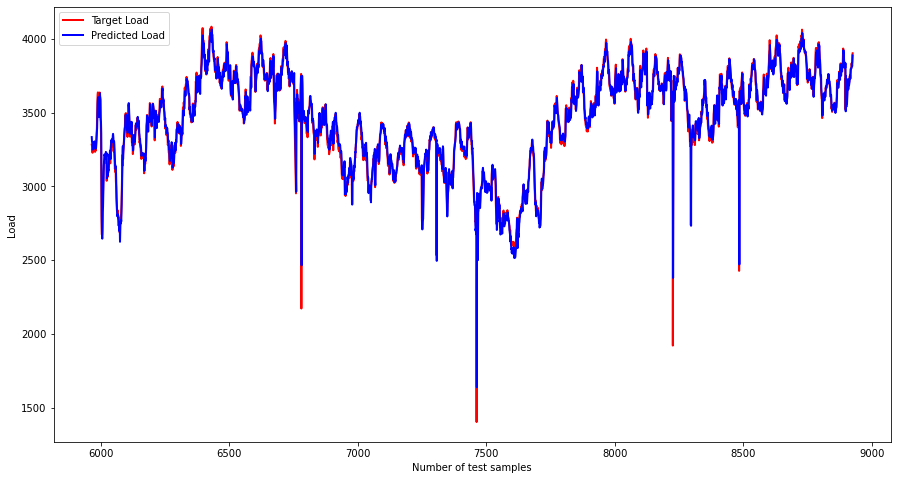

In [49]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

1.148725609338196


In [51]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+1   -0.100984
dtype: float64


In [52]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

              y_t+1
5964  328195.509996
5965  327195.956793
5966  324995.229698
5967  322694.767402
5968  325196.664842
...             ...
8922  383407.103087
8923  381905.772128
8924  384607.413490
8925  389208.618083
8926  390107.858321

[2963 rows x 1 columns]


In [53]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+1
5964  2635.450179
5965   964.268499
5966  1802.348713
5967  1988.379247
5968     9.675009
...           ...
8922   819.829027
8923   160.953889
8924  1082.429717
8925  2507.410574
8926   214.258635

[2963 rows x 1 columns]
y_t+1    6708.303431
dtype: float64


In [54]:
RMSE=MSE**0.5
print(RMSE)

y_t+1    81.904233
dtype: float64


In [55]:
a=np.array(rescaled_predicted_load)

In [56]:
for i in  range(0,2963):
    b=a[i]
    print(b)

[3334.3074]
[3304.0217]
[3293.4194]
[3272.5527]
[3249.8552]
[3270.3843]
[3266.427]
[3274.7588]
[3289.4683]
[3299.0557]
[3288.9382]
[3305.226]
[3290.2898]
[3270.0396]
[3252.86]
[3271.4746]
[3259.704]
[3263.4788]
[3300.7527]
[3329.2075]
[3371.2856]
[3397.281]
[3482.9746]
[3560.1826]
[3596.7727]
[3604.2756]
[3469.5344]
[3470.83]
[3478.077]
[3471.8774]
[3520.3582]
[3583.6113]
[3630.5022]
[3600.7197]
[3587.7896]
[3455.4617]
[3435.9087]
[3358.025]
[3037.9783]
[2797.6128]
[2661.7417]
[2645.9673]
[2674.9224]
[2827.9204]
[2864.4995]
[2958.8738]
[3066.0703]
[3140.8213]
[3170.67]
[3216.1833]
[3210.099]
[3210.854]
[3216.7085]
[3202.8118]
[3184.8987]
[3233.7942]
[3215.104]
[3205.2153]
[3225.6658]
[3055.6123]
[3070.4111]
[3107.983]
[3087.575]
[3075.4456]
[3115.1565]
[3106.3562]
[3116.8145]
[3166.5037]
[3215.9019]
[3188.4324]
[3222.5464]
[3242.7336]
[3224.6267]
[3184.1206]
[3241.4172]
[3288.6702]
[3314.0679]
[3299.2178]
[3299.185]
[3309.1548]
[3321.3303]
[3299.8813]
[3344.3928]
[3356.051]
[3335.792]


[3623.8513]
[3574.9224]
[3548.5044]
[3498.2456]
[3560.681]
[3565.5815]
[3536.7163]
[3568.2173]
[3566.4539]
[3441.915]
[3501.7585]
[3525.2917]
[3514.5317]
[3585.9182]
[3688.9111]
[3730.8252]
[3749.1223]
[2465.165]
[3445.344]
[3749.2212]
[3707.1404]
[3593.6626]
[3453.349]
[3452.4285]
[3453.9033]
[3472.2842]
[3511.6714]
[3480.649]
[3465.5552]
[3446.152]
[3441.4365]
[3456.8728]
[3466.254]
[3470.263]
[3459.8535]
[3453.3274]
[3429.3684]
[3409.0867]
[3379.6484]
[3413.837]
[3409.76]
[3366.8232]
[3465.1453]
[3512.851]
[3516.9463]
[3495.0825]
[3513.9055]
[3530.2327]
[3538.6792]
[3548.2441]
[3606.859]
[3613.3623]
[3587.1316]
[3577.8228]
[3554.7957]
[3563.0432]
[3561.2827]
[3547.7397]
[3498.415]
[3445.114]
[3458.8857]
[3444.9578]
[3449.0437]
[3427.4482]
[3392.9915]
[3379.8088]
[3372.4834]
[3346.914]
[3220.4553]
[3375.369]
[3371.2244]
[3355.859]
[3345.2393]
[3361.9043]
[3361.5303]
[3340.2637]
[3386.2742]
[3356.68]
[3346.123]
[3341.812]
[3355.297]
[3294.0164]
[3357.6729]
[3359.335]
[3370.792]
[3450.

[2769.4998]
[2773.6255]
[2808.9082]
[2824.179]
[2808.9658]
[2788.646]
[2766.5686]
[2766.8984]
[2758.4214]
[2738.127]
[2704.4458]
[2695.9177]
[2676.7925]
[2627.9253]
[2665.4402]
[2627.3804]
[2609.027]
[2574.7517]
[2577.9192]
[2549.3022]
[2565.5752]
[2545.1877]
[2544.2388]
[2577.5522]
[2566.6953]
[2556.7021]
[2587.6885]
[2575.591]
[2555.912]
[2514.5962]
[2535.3418]
[2519.4067]
[2517.6582]
[2522.6367]
[2545.4187]
[2570.004]
[2578.885]
[2612.3984]
[2684.6772]
[2692.9846]
[2764.0132]
[2782.6357]
[2582.3672]
[2646.5767]
[2679.3132]
[2673.9673]
[2656.1174]
[2714.9885]
[2748.5562]
[2758.8923]
[2786.6748]
[2793.7405]
[2825.5403]
[2832.4775]
[2820.7952]
[2821.2441]
[2836.9136]
[2854.8037]
[2842.6414]
[2869.4036]
[2849.8896]
[2831.3965]
[2923.466]
[2945.5723]
[2971.3323]
[3014.371]
[2981.794]
[2969.0605]
[2944.7095]
[2949.0837]
[2908.9568]
[2908.3877]
[2899.83]
[2881.5728]
[2914.953]
[2971.9668]
[2924.8936]
[2890.3992]
[2883.5574]
[2906.2402]
[2946.4373]
[2982.995]
[2978.2385]
[2963.3433]
[3035.8

[3852.0613]
[3850.5193]
[3813.2385]
[3758.5598]
[3765.874]
[3789.498]
[3833.7227]
[3807.5127]
[3857.4004]
[3864.7688]
[3866.5972]
[3817.3572]
[3856.2126]
[3923.0771]
[3928.0005]
[3934.4595]
[3992.7725]
[3991.766]
[3990.1897]
[3962.1172]
[3939.2573]
[3940.2283]
[3884.3103]
[3930.9668]
[3948.715]
[3937.2014]
[3961.4277]
[3948.6]
[3953.4912]
[3908.4102]
[3898.5637]
[3864.4973]
[3825.217]
[3779.21]
[3770.6482]
[3737.8413]
[3743.405]
[3745.5771]
[3688.2388]
[3718.6873]
[3680.4097]
[3685.1455]
[3633.5095]
[3664.4993]
[3676.6262]
[3684.6987]
[3689.753]
[3602.738]
[3576.9565]
[3595.29]
[3616.2388]
[3625.3357]
[3605.9607]
[3585.851]
[3583.3271]
[3559.6602]
[3588.608]
[3593.1555]
[3608.7979]
[3679.1553]
[3756.5867]
[3744.59]
[3772.497]
[3772.177]
[3681.282]
[3664.2712]
[3681.7148]
[3653.115]
[3711.5742]
[3770.2898]
[3750.1704]
[3734.225]
[3783.4956]
[3808.6536]
[3827.2153]
[3808.6313]
[3749.2603]
[3775.9634]
[3761.2412]
[3764.6763]
[3743.895]
[3793.0125]
[3831.43]
[3865.5872]
[3750.119]
[3741.44